In [1]:
import pandas as pd
%pylab inline
import seaborn


Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

#we can display the first rows of one of the datasets
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#let's check that PassengerId is a unique key
print 'train dataset check return', train.index.is_unique
print 'test dataset check return', test.index.is_unique
print 'we check that train higher index value',train.index.max()
print 'is below test lower value (no intersection)', test.index.min()

#and we expect the 2 datasets to have the same columns except 
#for the 'Survived' column (not in the test dataset):
print train.columns ^ test.columns == 'Survived'

train dataset check return True
test dataset check return True
we check that train higher index value 890
is below test lower value (no intersection) 0
[ True]


In [50]:
#we merge the two datasets
dataset = pd.concat([train, test], axis = 0)
dataset.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [5]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
dataset.describe() - dataset[dataset.Age.isnull()].describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.0,1045.000000,1046.000000,1046.000000,1046.000000,1046.000000,714.000000
mean,NaN,13.472160,0.141681,1.441065,-0.347704,0.015964,0.090053
std,NaN,24.208001,-0.084381,-2.141751,0.111024,-0.406785,0.029805
min,NaN,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000
25%,NaN,0.145800,0.000000,-7.500000,-1.000000,0.000000,0.000000
50%,NaN,6.404200,0.000000,25.000000,0.000000,0.000000,0.000000
75%,NaN,8.470850,0.000000,-17.500000,0.000000,1.000000,0.000000
max,NaN,284.804200,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#we choose to remove from the study the passengers for which the age
#data is not available
dataset_clean = dataset[dataset.Age.notnull()]

In [8]:

dataset_clean.describe()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1045.000000,1046.00000,1046.000000,1046.000000,1046.000000,714.000000
mean,29.881138,36.686080,0.42065,655.362333,2.207457,0.502868,0.406162
std,14.413493,55.732533,0.83975,377.661401,0.841497,0.912167,0.491460
min,0.170000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,8.050000,0.00000,326.250000,1.000000,0.000000,0.000000
50%,28.000000,15.750000,0.00000,662.500000,2.000000,0.000000,0.000000
75%,39.000000,35.500000,1.00000,973.750000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.00000,1307.000000,3.000000,8.000000,1.000000


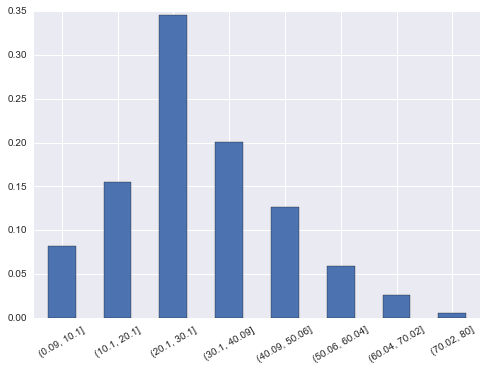

In [54]:
categories = pd.cut(dataset_clean.Age,8,precision=1)
len_cat = dataset_clean.shape[0]
repartition_by_cat = pd.value_counts(categories).sort_index()/len_cat
repartition_by_cat
repartition_by_cat.plot(kind = 'bar', rot = 30)
plt.show()

In [10]:
#we look at the passenger with Fare missing information
dataset_clean[dataset_clean.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [11]:
#as we have only one exception here, we decide to take him out of the study
dataset_clean2 = dataset_clean[dataset_clean.Fare.notnull()]
dataset_clean2.shape

(1045, 12)

In [12]:
#if we look at the 8 free travellers
print dataset_clean2[dataset_clean2.Fare == 0].shape[0]
dataset_clean2[dataset_clean2.Fare == 0]

8


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,LINE
263,40.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,LINE
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,LINE
806,39.0,A36,S,0.0,"Andrews, Mr. Thomas Jr",0,807,1,male,0,0.0,112050
822,38.0,NaN,S,0.0,"Reuchlin, Jonkheer. John George",0,823,1,male,0,0.0,19972
372,49.0,B52 B54 B56,S,0.0,"Ismay, Mr. Joseph Bruce",0,1264,1,male,0,NaN,112058


In [13]:
dataset_clean2[dataset_clean2.Ticket =='LINE']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,LINE
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,LINE
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,LINE


In [14]:
#we look at the number of passengers with unknown cabin number and the
#repartition by Pclass (maybe 3rd class tickets have no cabin booked?)
print dataset_clean2[dataset_clean2.Cabin.isnull()].shape[0]
print dataset_clean2[dataset_clean2.Cabin.isnull()].Pclass.value_counts()

773
3    487
2    240
1     46
Name: Pclass, dtype: int64


In [15]:
#As before, as we only have 8 exceptions here, let's take 
#them out of the sample
dataset_clean3 = dataset_clean2[dataset_clean2.Fare != 0]
dataset_clean3.shape

(1037, 12)

In [16]:
dataset_clean3.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,707.000000
mean,29.797657,36.969097,0.424301,655.693346,2.208293,0.507232,0.408769
std,14.405549,55.853628,0.842470,377.734765,0.840004,0.914911,0.491955
min,0.170000,3.170800,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,8.050000,0.000000,328.000000,1.000000,0.000000,0.000000
50%,28.000000,15.850000,0.000000,663.000000,2.000000,0.000000,0.000000
75%,39.000000,36.750000,1.000000,974.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,1307.000000,3.000000,8.000000,1.000000


In [17]:

def plot_cat_n (filt,subdata = dataset_clean3, rot=0):
    grouped = subdata.groupby(filt).size()
    grouped_pct = grouped/subdata.shape[0]
    return grouped_pct.plot(kind = 'bar',rot=rot)

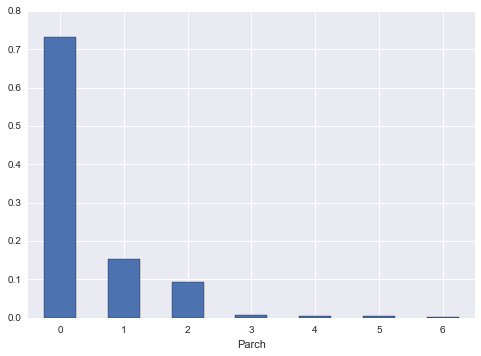

In [18]:
#looking at Parch distribution
plot_cat_n('Parch')

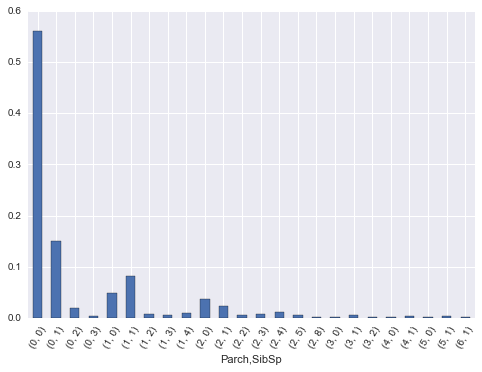

In [19]:
#looking at Parch&SibSp distribution
plot_cat_n(['Parch', 'SibSp'], rot = 60)

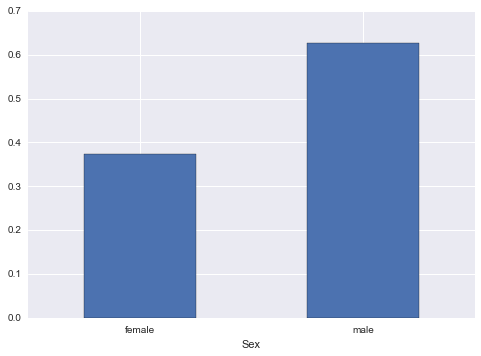

In [20]:
#looking at gender distribution
plot_cat_n('Sex')

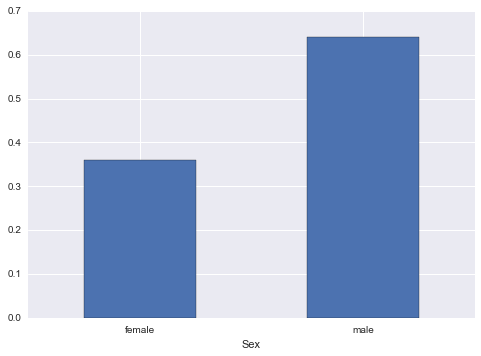

In [21]:
#gender distribution if we only look at passenger older than 16
plot_cat_n('Sex', subdata = dataset_clean3[dataset_clean3.Age >= 16])

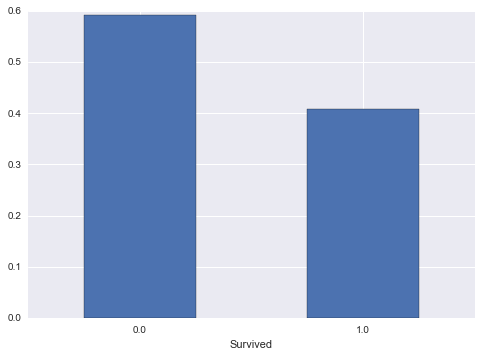

In [22]:
subd = dataset_clean3[dataset_clean3.Survived.notnull()]
plot_cat_n('Survived', subdata = subd)

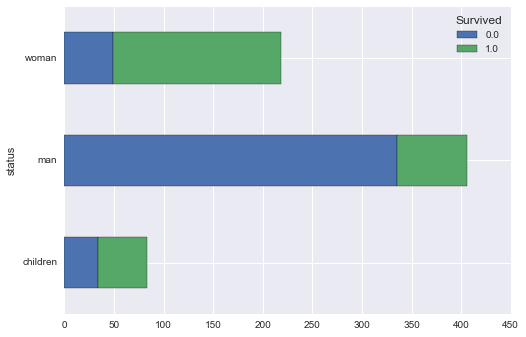

In [23]:
#add a status column with (children -we'll take 16y as tresh, 
#woman, man)
age_r = dataset_clean3.Age
gender_r = dataset_clean3.Sex
#we use the where to concatenate age and sex info in a status column
status = np.where (age_r < 16, 'children', 
                  np.where(gender_r == 'female', 'woman', 'man'))
#we creat a copy of the old DataFrame and add a new column
dataset_clean4 = dataset_clean3.copy()
dataset_clean4['status']=status
#we groupby both status and Survived criteria
grouped = dataset_clean4.groupby(['status','Survived']).size()
#we unstack and splot the data
grouped.unstack().plot(kind = 'barh', stacked = True)

status    Survived
children  0.0          34
          1.0          49
man       0.0         335
          1.0          71
woman     0.0          49
          1.0         169
dtype: int64
Survived  0.0  1.0
status            
children   34   49
man       335   71
woman      49  169


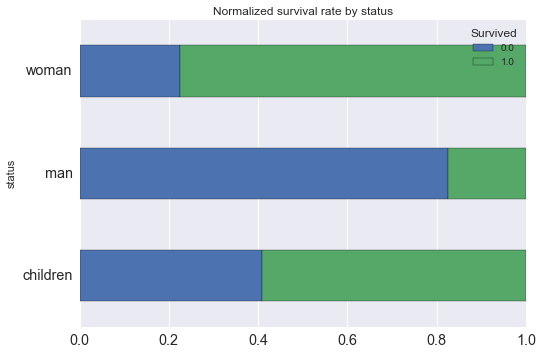

In [42]:
#would be more meaningful if normalized
#we define a plot_function customized to our needs and plot the data
def plot_n(filt,title,kind='barh', fontsize = 'large', 
           subdata = dataset_clean4):
    grouped = subdata.groupby([filt,'Survived']).size()
    print grouped
    grouped_u = grouped.unstack()
    print grouped_u
    grouped_un = grouped_u.div(grouped_u.sum(1), axis = 0)
    return grouped_un.plot(kind = 'barh',
                              stacked =True,
                              fontsize = fontsize,
                              title = title)

plot_n('status', 'Normalized survival rate by status')

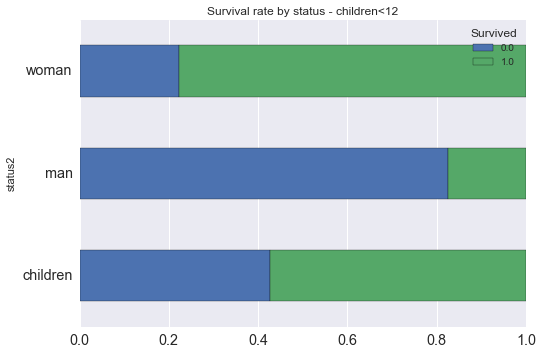

In [25]:
status2 = np.where (age_r < 12, 'children', 
                  np.where(gender_r == 'female', 'woman', 'man'))
dataset_clean4['status2']=status2
#we plot the survival rate corresponding to those new categories
plot_n ('status2', 'Survival rate by status - children<12')

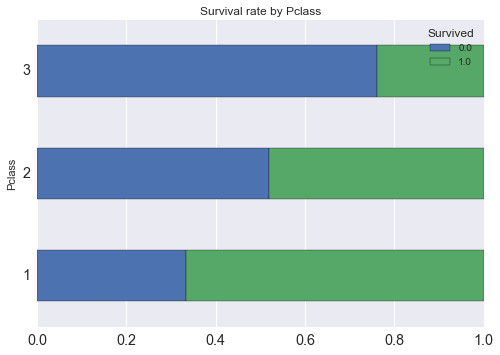

In [26]:
plot_n('Pclass', 'Survival rate by Pclass')

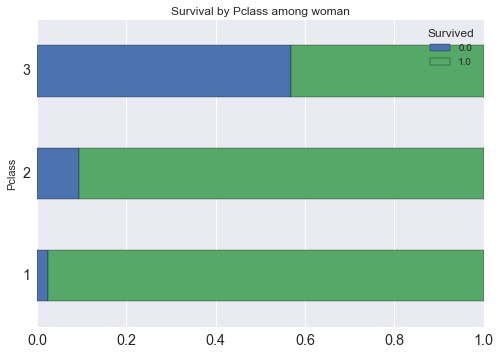

In [38]:

#We define a function that we'll use for the 3 status
def plot_n_restr(gender):
    restr_dataset = dataset_clean4[dataset_clean4.status == gender] 
    restr_grouped = restr_dataset.groupby(['Pclass','Survived']).size()
    return plot_n('Pclass', 'Survival by Pclass among %s'%gender, subdata = restr_dataset)

plot_n_restr('woman')


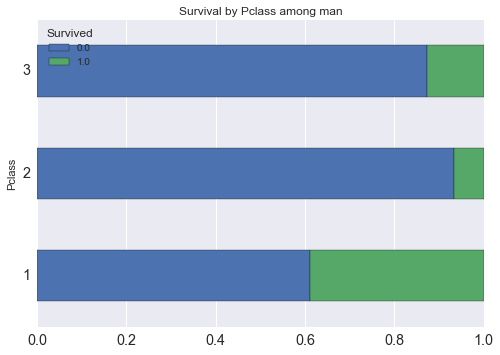

In [39]:
plot_n_restr('man')

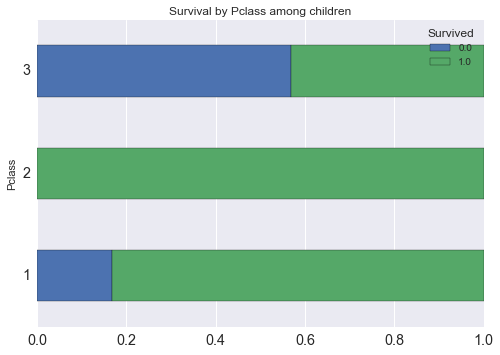

In [40]:
#we consider only children
plot_n_restr('children')

In [30]:
#we select the train database out of the cleaned database and only on
#some criteria (we try to avoid criteria that would have split the
#sample too much such as Name or Ticket to avoid overfitting effect)
train_clean = dataset_clean4[dataset_clean4.Survived.notnull()]
train_clean_select = train_clean[['Sex','Age','SibSp','Parch',
                                 'Embarked', 'Survived','Pclass',
                                 'Name']]
train_clean_select.shape

(707, 8)

In [32]:
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
#we have to create dummy variables for caterogical variables
f = 'Survived~Sex+Age+SibSp+Parch+Embarked+Pclass'
y,X = patsy.dmatrices(f, train_clean_select, return_type = 'dataframe')
y = np.ravel(y)
#we use sickit logistic regression module
model = LogisticRegression()
#and train it on our dataset
model = model.fit(X,y)
accuracy = model.score(X,y)
print '%0.2f' % accuracy
#we compute the null error rate to make sure our model is better at 
#predicting than simply taking the mean of the train set
null_rate = y.mean()
print '%0.2f' % null_rate
print '%0.2f' % (accuracy - null_rate)

0.80
0.41
0.39


In [33]:
#we take a look at the coefficients
pd.DataFrame(zip(X.columns, model.coef_.T))

,0,1
0,Intercept,[2.46327744348]
1,Sex[T.male],[-2.39141648156]
2,Embarked[T.Q],[-0.521280674278]
3,Embarked[T.S],[-0.288372105424]
4,Age,[-0.0350489273091]
5,SibSp,[-0.297234670426]
6,Parch,[-0.0116288364407]
7,Pclass,[-1.11008242335]


In [35]:
#we split our sample between a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
#and look at the performance of our model
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.79       125
        1.0       0.71      0.64      0.67        87

avg / total       0.74      0.75      0.74       212



In [37]:
#we split our sample between a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
#and look at the performance of our model
print metrics.classification_report(y_test, predicted)


             precision    recall  f1-score   support

        0.0       0.77      0.82      0.79       125
        1.0       0.71      0.64      0.67        87

avg / total       0.74      0.75      0.74       212

